<a href="https://colab.research.google.com/github/viniciusriosfuck/SQLwithPython/blob/main/SQLwithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL with Python






## General stuff

https://www.udemy.com/course/learn-microsoft-sql-t-sql-beginner-to-expert/

ANSI: American National Standards Institute

T-SQL: Transact SQL (Microsoft): declarative

PL/SQL: (Oracle)


RDBMS: Relation Database Management System

SQL Server (Microsoft): RDBMS

Oracle, MySQL, PostgreSQL

Normalization Levels: Forms (1,2,3NF)
* avoid data redundancy with use of Foreign Keys
* 1NF
    * elimante repeating groups of entities into individual tables
* 2NF
    * create separate tables for sets of values that apply to multiple records
* 3NF
    * Eliminates fields that does not depende on the PK


Modifying data
* INSERT
* UPDATE
* DELETE

Filter: Where
* basic equality / comparison
* basic logical
* string comparison
* NULL comparison


## Pandas as SQL

https://towardsdatascience.com/using-the-pandas-data-frame-as-a-database-282edec5a3ab

In [1]:
import pandas as pd

df = pd.DataFrame({'Company Name':['Google', 'Microsoft', 'SpaceX', 'Amazon', 'Samsung'], 
                   'Founders':['Larry Page, Sergey Brin', 'Bill Gates, Paul Allen','Elon Musk','Jeff Bezos', 'Lee Byung-chul'], 
                   'Founded': [1998, 1975, 2002, 1994, 1938], 
                   'Number of Employees': ['103,459', '144,106', '6,500', '647,500', '320,671']})
df


,Company Name,Founders,Founded,Number of Employees
0,Google,"Larry Page, Sergey Brin",1998,"103,459"
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


### Insert / Append

In [2]:
df1 = pd.DataFrame({'Company Name':['WhatsApp'], 'Founders':['Jan Koum, Brian Acton'], 'Founded': [2009], 'Number of Employees': ['50'] })

df = df.append(df1, ignore_index=True)
df

,Company Name,Founders,Founded,Number of Employees
0,Google,"Larry Page, Sergey Brin",1998,"103,459"
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"
5,WhatsApp,"Jan Koum, Brian Acton",2009,50


### Delete / Drop

In [3]:
df = df.drop([df.index[5]])
df

,Company Name,Founders,Founded,Number of Employees
0,Google,"Larry Page, Sergey Brin",1998,"103,459"
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


In [4]:
df = df[df.Founders != 'Larry Page, Sergey Brin']
df

,Company Name,Founders,Founded,Number of Employees
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


### Select / loc / iloc

In [5]:
df.loc[2]

Company Name              SpaceX
Founders               Elon Musk
Founded                     2002
Number of Employees        6,500
Name: 2, dtype: object

### Update / at

In [6]:
df.at[1, 'Number of Employees'] = '200,000'
df # This is after the change of value (Microsoft)

,Company Name,Founders,Founded,Number of Employees
1,Microsoft,"Bill Gates, Paul Allen",1975,"200,000"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


In [7]:
df.iloc[3] = ['YouTube', 'Chad Hurley, Steve Chen, Jawed Karim', 2005, '2,800']
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,Company Name,Founders,Founded,Number of Employees
1,Microsoft,"Bill Gates, Paul Allen",1975,"200,000"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,YouTube,"Chad Hurley, Steve Chen, Jawed Karim",2005,"2,800"


## SQL in Pandas (sqlalchemy)

https://stackoverflow.com/questions/12047193/how-to-convert-sql-query-result-to-pandas-data-structure

### df to SQL

In [8]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

df = pd.DataFrame({'name' : ['User 1', 'User 2', 'User 3']})
df.to_sql('users', con=engine)
engine.execute("SELECT * FROM users").fetchall()


[(0, 'User 1'), (1, 'User 2'), (2, 'User 3')]

In [9]:
with engine.begin() as connection:
    df1 = pd.DataFrame({'name' : ['User 4', 'User 5']})
    df1.to_sql('users', con=connection, if_exists='append')
engine.execute("SELECT * FROM users").fetchall()

[(0, 'User 1'), (1, 'User 2'), (2, 'User 3'), (0, 'User 4'), (1, 'User 5')]

In [10]:
df2 = pd.DataFrame({'name' : ['User 6', 'User 7']})
df2.to_sql('users', con=engine, if_exists='append')
engine.execute("SELECT * FROM users").fetchall()

[(0, 'User 1'),
 (1, 'User 2'),
 (2, 'User 3'),
 (0, 'User 4'),
 (1, 'User 5'),
 (0, 'User 6'),
 (1, 'User 7')]

In [11]:
df2.to_sql('users', con=engine, if_exists='replace',
           index_label='id')
engine.execute("SELECT * FROM users").fetchall()

[(0, 'User 6'), (1, 'User 7')]

In [12]:
df = pd.DataFrame({"A": [1, None, 2]})
from sqlalchemy.types import Integer
df.to_sql('integers', con=engine, index=False,
          dtype={"A": Integer()})
engine.execute("SELECT * FROM integers").fetchall()

[(1,), (None,), (2,)]

https://docs.sqlalchemy.org/en/14/core/metadata.html

In [13]:
from sqlalchemy import *

metadata = MetaData()

user = Table('user', metadata,
    Column('user_id', Integer, primary_key=True),
    Column('user_name', String(16), nullable=False),
    Column('email_address', String(60)),
    Column('nickname', String(50), nullable=False)
)

for t in metadata.sorted_tables:
    print(t.name)

user


In [14]:
employees = Table('employees', metadata,
    Column('employee_id', Integer, primary_key=True),
    Column('employee_name', String(60), nullable=False),
    Column('employee_dept', Integer, ForeignKey("departments.department_id"))
)

In [15]:
# access the column "EMPLOYEE_ID":
employees.columns.employee_id

# or just
employees.c.employee_id

# via string
employees.c['employee_id']

# iterate through all columns
for c in employees.c:
    print(c)

# get the table's primary key columns
for primary_key in employees.primary_key:
    print(primary_key)

# get the table's foreign key objects:
for fkey in employees.foreign_keys:
    print(fkey)

# access the table's MetaData:
employees.metadata

# access the table's bound Engine or Connection, if its MetaData is bound:
employees.bind

# access a column's name, type, nullable, primary key, foreign key
employees.c.employee_id.name
employees.c.employee_id.type
employees.c.employee_id.nullable
employees.c.employee_id.primary_key
employees.c.employee_dept.foreign_keys

# get the "key" of a column, which defaults to its name, but can
# be any user-defined string:
employees.c.employee_name.key

# access a column's table:
employees.c.employee_id.table is employees

# get the table related by a foreign key
# list(employees.c.employee_dept.foreign_keys)[0].column.table

employees.employee_id
employees.employee_name
employees.employee_dept
employees.employee_id
ForeignKey('departments.department_id')


True

In [16]:
engine = create_engine('sqlite:///:memory:')

metadata = MetaData()

user = Table('user', metadata,
    Column('user_id', Integer, primary_key=True),
    Column('user_name', String(16), nullable=False),
    Column('email_address', String(60), key='email'),
    Column('nickname', String(50), nullable=False)
)

user_prefs = Table('user_prefs', metadata,
    Column('pref_id', Integer, primary_key=True),
    Column('user_id', Integer, ForeignKey("user.user_id"), nullable=False),
    Column('pref_name', String(40), nullable=False),
    Column('pref_value', String(100))
)

metadata.create_all(engine)

In [17]:
engine = create_engine('sqlite:///:memory:')

meta = MetaData()

employees = Table('employees', meta,
    Column('employee_id', Integer, primary_key=True),
    Column('employee_name', String(60), nullable=False, key='name'),
    # Column('employee_dept', Integer, ForeignKey("departments.department_id"))
)
employees.create(engine)

In [18]:
employees.drop(engine)

In [19]:
employees.create(engine, checkfirst=True)
employees.drop(engine, checkfirst=False)

In [20]:
metadata = MetaData()

financial_info = Table(
    'financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('value', String(100), nullable=False),
    schema='remote_banks'
)

In [21]:
# print(select(financial_info))

In [22]:
metadata.tables['remote_banks.financial_info']

Table('financial_info', MetaData(bind=None), Column('id', Integer(), table=<financial_info>, primary_key=True, nullable=False), Column('value', String(length=100), table=<financial_info>, nullable=False), schema='remote_banks')

In [23]:
customer = Table(
    "customer",
    metadata,
    Column('id', Integer, primary_key=True),
    Column('financial_info_id', ForeignKey("remote_banks.financial_info.id")),
    schema='remote_banks'
)

In [24]:
schema="dbo.scott"

In [25]:
metadata = MetaData(schema="remote_banks")

financial_info = Table(
    'financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('value', String(100), nullable=False),
)

In [26]:
# either will work:

refers_to_financial_info = Table(
    'refers_to_financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('fiid', ForeignKey('financial_info.id')),
)


# or

# refers_to_financial_info = Table(
#     'refers_to_financial_info',
#     metadata,
#     Column('id', Integer, primary_key=True),
#     Column('fiid', ForeignKey('remote_banks.financial_info.id')),
# )

In [27]:
from sqlalchemy import BLANK_SCHEMA

metadata = MetaData(schema="remote_banks")

financial_info = Table(
    'financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('value', String(100), nullable=False),
    schema=BLANK_SCHEMA  # will not use "remote_banks"
)

In [28]:
addresses = Table('engine_email_addresses', meta,
    Column('address_id', Integer, primary_key=True),
    # Column('remote_user_id', Integer, ForeignKey(users.c.user_id)),
    Column('email_address', String(20)),
    mysql_engine='InnoDB'
)

In [29]:
for t in metadata.sorted_tables:
    print(t.name)

financial_info


# PandasSQL

https://pypi.org/project/pandasql/

https://www.kdnuggets.com/2017/02/python-speak-sql-pandasql.html

In [30]:
!pip install pandasql

In [31]:
#Checking out meat and birth data
from pandasql import sqldf
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

#You can inspect the dataframes directly if you're using Rodeo
#These print statements are here just in case you want to check out your data in the editor, too
print(meat.head())
births.head()

        date   beef   veal  ...  broilers  other_chicken  turkey
0 1944-01-01  751.0   85.0  ...       NaN            NaN     NaN
1 1944-02-01  713.0   77.0  ...       NaN            NaN     NaN
2 1944-03-01  741.0   90.0  ...       NaN            NaN     NaN
3 1944-04-01  650.0   89.0  ...       NaN            NaN     NaN
4 1944-05-01  681.0  106.0  ...       NaN            NaN     NaN

[5 rows x 8 columns]


,date,births
0,1975-01-01,265775
1,1975-02-01,241045
2,1975-03-01,268849
3,1975-04-01,247455
4,1975-05-01,254545


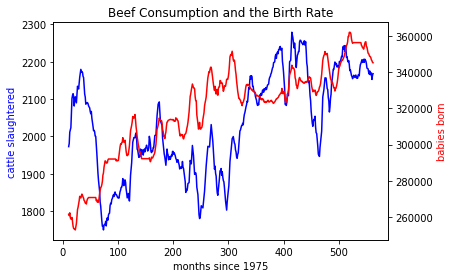

In [32]:
# Let's make a graph to visualize the data
# Bet you haven't had a title quite like this before
import matplotlib.pyplot as plt
from pandasql import *
import pandas as pd

pysqldf = lambda q: sqldf(q, globals())

q  = """
SELECT
  m.date
  , m.beef
  , b.births
FROM
  meat m
LEFT JOIN
  births b
    ON m.date = b.date
WHERE
    m.date > '1974-12-31';
"""

meat = load_meat()
births = load_births()

df = pysqldf(q)
df.births = df.births.fillna(method='backfill')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df[['beef']].rolling(12).mean(), color='b')
ax1.set_xlabel('months since 1975')
ax1.set_ylabel('cattle slaughtered', color='b')

ax2 = ax1.twinx()
ax2.plot(df[['births']].rolling(12).mean(), color='r')
ax2.set_ylabel('babies born', color='r')
plt.title("Beef Consumption and the Birth Rate")
plt.show()

In [33]:
q = """
    SELECT
        *
    FROM
        meat
    LIMIT 10;"""

print(sqldf(q, locals()))

                         date   beef   veal  ...  broilers  other_chicken turkey
0  1944-01-01 00:00:00.000000  751.0   85.0  ...      None           None   None
1  1944-02-01 00:00:00.000000  713.0   77.0  ...      None           None   None
2  1944-03-01 00:00:00.000000  741.0   90.0  ...      None           None   None
3  1944-04-01 00:00:00.000000  650.0   89.0  ...      None           None   None
4  1944-05-01 00:00:00.000000  681.0  106.0  ...      None           None   None
5  1944-06-01 00:00:00.000000  658.0  125.0  ...      None           None   None
6  1944-07-01 00:00:00.000000  662.0  142.0  ...      None           None   None
7  1944-08-01 00:00:00.000000  787.0  175.0  ...      None           None   None
8  1944-09-01 00:00:00.000000  774.0  182.0  ...      None           None   None
9  1944-10-01 00:00:00.000000  834.0  215.0  ...      None           None   None

[10 rows x 8 columns]


In [34]:
# births per year
q = """
    SELECT
        strftime("%Y", date)
        , SUM(births)
    FROM births
    GROUP BY 1
    ORDER BY 1;
            """

print( sqldf(q, locals()))

   strftime("%Y", date)  SUM(births)
0                  1975      3136965
1                  1976      6304156
2                  1979      3333279
3                  1982      3612258
4                  1983      7333238
5                  1986      7308074
6                  1987      3760561
7                  1988      3756547
8                  1990      7718904
9                  1991     11714356
10                 1993      8194907
11                 1995      4000240
12                 1996      3952767
13                 1997      3899589
14                 1998      3891494
15                 1999      3880894
16                 2000      3941553
17                 2001      8018231
18                 2002      4025933
19                 2003      4021726
20                 2005      8210950
21                 2007      4138349
22                 2008      4265555
23                 2011      4247694
24                 2012      4130665


In [35]:
def pysqldf(q):
    return sqldf(q, globals())

q = """
    SELECT
        *
    FROM
        births
    LIMIT 10;"""

print(pysqldf(q))

                         date  births
0  1975-01-01 00:00:00.000000  265775
1  1975-02-01 00:00:00.000000  241045
2  1975-03-01 00:00:00.000000  268849
3  1975-04-01 00:00:00.000000  247455
4  1975-05-01 00:00:00.000000  254545
5  1975-06-01 00:00:00.000000  254096
6  1975-07-01 00:00:00.000000  275163
7  1975-08-01 00:00:00.000000  281300
8  1975-09-01 00:00:00.000000  270738
9  1975-10-01 00:00:00.000000  265494


In [36]:
# joining meats + births on date
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = pysqldf(q)
print(joined.head())

                         date  births    beef
0  1975-01-01 00:00:00.000000  265775  2106.0
1  1975-02-01 00:00:00.000000  241045  1845.0
2  1975-03-01 00:00:00.000000  268849  1891.0
3  1975-04-01 00:00:00.000000  247455  1895.0
4  1975-05-01 00:00:00.000000  254545  1849.0


In [37]:
q = """
    SELECT
        date
        , beef
        , veal
        , pork
        , lamb_and_mutton
    FROM
        meat
    WHERE
        lamb_and_mutton >= veal
    ORDER BY date DESC
    LIMIT 10;
    """

print(pysqldf(q))

                         date    beef  veal    pork  lamb_and_mutton
0  2012-11-01 00:00:00.000000  2206.6  10.1  2078.7             12.4
1  2012-10-01 00:00:00.000000  2343.7  10.3  2210.4             14.2
2  2012-09-01 00:00:00.000000  2016.0   8.8  1911.0             12.5
3  2012-08-01 00:00:00.000000  2367.5  10.1  1997.9             14.2
4  2012-07-01 00:00:00.000000  2200.8   9.5  1721.8             12.5
5  2012-06-01 00:00:00.000000  2252.1   8.9  1750.4             12.4
6  2012-05-01 00:00:00.000000  2232.0  10.4  1926.8             13.6
7  2012-04-01 00:00:00.000000  1990.6   9.9  1841.7             12.9
8  2012-03-01 00:00:00.000000  2159.8  10.0  1987.9             14.2
9  2012-02-01 00:00:00.000000  2009.0   9.8  1882.9             12.3


In [38]:
#################################################
# SQL FUNCTIONS
# e.g. `RANDOM()`
#################################################
q = """SELECT
    *
    FROM
        meat
    ORDER BY RANDOM()
    LIMIT 10;"""
print(pysqldf(q))
#                   date  beef  veal  pork  lamb_and_mutton  broilers other_chicken  turkey
# 0  1967-03-01 00:00:00  1693    65  1136               61     472.0          None    26.5
# 1  1944-12-01 00:00:00   764   146  1013               91       NaN          None     NaN
# 2  1969-06-01 00:00:00  1666    50   964               42     573.9          None    85.4
# 3  1983-03-01 00:00:00  1892    37  1303               36    1106.2          None   182.7


                         date    beef  veal  ...  broilers  other_chicken  turkey
0  1984-06-01 00:00:00.000000  1984.0  38.0  ...    1113.5            NaN   223.6
1  1954-02-01 00:00:00.000000   921.0  99.0  ...       NaN            NaN     NaN
2  1946-04-01 00:00:00.000000   734.0  91.0  ...       NaN            NaN     NaN
3  1974-04-01 00:00:00.000000  1853.0  28.0  ...     672.4            NaN    80.1
4  1958-08-01 00:00:00.000000  1079.0  92.0  ...       NaN            NaN     NaN
5  1994-08-01 00:00:00.000000  2215.0  24.0  ...    2206.2            NaN   483.6
6  1992-04-01 00:00:00.000000  1787.0  25.0  ...    1729.7            NaN   385.2
7  1975-12-01 00:00:00.000000  2055.0  76.0  ...     691.4            NaN   157.5
8  1990-04-01 00:00:00.000000  1748.0  22.0  ...    1489.3            NaN   328.4
9  2007-01-01 00:00:00.000000  2166.0  14.3  ...    3029.8           39.5   482.4

[10 rows x 8 columns]


In [39]:

#################################################
# UNION ALL
#################################################
q = """
        SELECT
            date
            , 'beef' AS meat_type
            , beef AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'veal' AS meat_type
            , veal AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'pork' AS meat_type
            , pork AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'lamb_and_mutton' AS meat_type
            , lamb_and_mutton AS value
        FROM meat
        ORDER BY 1
    """
print(pysqldf(q).head(20))
#                    date        meat_type  value
# 0   1944-01-01 00:00:00             beef    751
# 1   1944-01-01 00:00:00             veal     85
# 2   1944-01-01 00:00:00             pork   1280
# 3   1944-01-01 00:00:00  lamb_and_mutton     89


                          date        meat_type   value
0   1944-01-01 00:00:00.000000             beef   751.0
1   1944-01-01 00:00:00.000000             veal    85.0
2   1944-01-01 00:00:00.000000             pork  1280.0
3   1944-01-01 00:00:00.000000  lamb_and_mutton    89.0
4   1944-02-01 00:00:00.000000             beef   713.0
5   1944-02-01 00:00:00.000000             veal    77.0
6   1944-02-01 00:00:00.000000             pork  1169.0
7   1944-02-01 00:00:00.000000  lamb_and_mutton    72.0
8   1944-03-01 00:00:00.000000             beef   741.0
9   1944-03-01 00:00:00.000000             veal    90.0
10  1944-03-01 00:00:00.000000             pork  1128.0
11  1944-03-01 00:00:00.000000  lamb_and_mutton    75.0
12  1944-04-01 00:00:00.000000             beef   650.0
13  1944-04-01 00:00:00.000000             veal    89.0
14  1944-04-01 00:00:00.000000             pork   978.0
15  1944-04-01 00:00:00.000000  lamb_and_mutton    66.0
16  1944-05-01 00:00:00.000000             beef 

In [40]:
#################################################
# subqueries
# fancy!
#################################################
q = """
    SELECT
        m1.date
        , m1.beef
    FROM
        meat m1
    WHERE m1.date IN
        (SELECT
            date
        FROM meat
        WHERE
            beef >= broilers
        ORDER BY date)
"""

more_beef_than_broilers = pysqldf(q)
print(more_beef_than_broilers.head(10))
#                   date  beef
# 0  1960-01-01 00:00:00  1196
# 1  1960-02-01 00:00:00  1089
# 2  1960-03-01 00:00:00  1201
# 3  1960-04-01 00:00:00  1066

                         date    beef
0  1960-01-01 00:00:00.000000  1196.0
1  1960-02-01 00:00:00.000000  1089.0
2  1960-03-01 00:00:00.000000  1201.0
3  1960-04-01 00:00:00.000000  1066.0
4  1960-05-01 00:00:00.000000  1202.0
5  1960-06-01 00:00:00.000000  1247.0
6  1960-07-01 00:00:00.000000  1166.0
7  1960-08-01 00:00:00.000000  1307.0
8  1960-09-01 00:00:00.000000  1298.0
9  1960-10-01 00:00:00.000000  1263.0


# SQLite in Python

https://realpython.com/python-sql-libraries/

In [41]:
# Import pandas
import pandas as pd 

# Import Twitter data as DataFrame: df
# df = pd.read_csv('tweets.csv') 
df = pd.DataFrame(
    data=[
          'en',  # 1st row
          'en',  # 2nd row
          'und', # 3rd row
          'et',  # 4th row
          'und'  # 5th row
          ],
    columns=['lang']
)

# Initialize an empty dictionary: langs_count
langs_count = {}

# Extract column from DataFrame: col
col = df['lang']

print('before the loop, langs_count is an empty dict')
print(langs_count, '\n')
# Iterate over lang column in DataFrame
for ii, entry in enumerate(col):

    # If the language is in langs_count, add 1 
    if entry in langs_count.keys():
        print(f'{ii}\nif: the key "{col.iloc[ii]}" exists, so adds 1 to value')
        langs_count[entry] += 1
    # Else add the language to langs_count, set the value to 1
    else:
        print(f'{ii}\nelse: the key "{col.iloc[ii]}" does not exist, so create it with value 1')
        langs_count[entry] = 1
    print(langs_count, '\n')

# Print the populated dictionary
# print(langs_count)
#{'en': 97, 'et': 1, 'und': 2}

# the same could be reached through
# without the need of loop or if / else
print('value_counts solution')
df['lang'].value_counts().to_dict()

before the loop, langs_count is an empty dict
{} 

0
else: the key "en" does not exist, so create it with value 1
{'en': 1} 

1
if: the key "en" exists, so adds 1 to value
{'en': 2} 

2
else: the key "und" does not exist, so create it with value 1
{'en': 2, 'und': 1} 

3
else: the key "et" does not exist, so create it with value 1
{'en': 2, 'und': 1, 'et': 1} 

4
if: the key "und" exists, so adds 1 to value
{'en': 2, 'und': 2, 'et': 1} 

value_counts solution


{'en': 2, 'et': 1, 'und': 2}

In [42]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection


def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")


def execute_read_query(connection, query):
    # Select
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


connection = create_connection("E:\\sm_app.sqlite")

Connection to SQLite DB successful


### Create

In [43]:
create_users_table = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);
"""

create_posts_table = """
CREATE TABLE IF NOT EXISTS posts(
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  title TEXT NOT NULL, 
  description TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id)
);
"""

create_comments_table = """
CREATE TABLE IF NOT EXISTS comments (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  text TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  post_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id) FOREIGN KEY (post_id) REFERENCES posts (id)
);
"""

create_likes_table = """
CREATE TABLE IF NOT EXISTS likes (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  user_id INTEGER NOT NULL, 
  post_id integer NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id) FOREIGN KEY (post_id) REFERENCES posts (id)
);
"""

execute_query(connection, create_users_table) 
execute_query(connection, create_posts_table)
execute_query(connection, create_comments_table)  
execute_query(connection, create_likes_table) 

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


### Insert

In [44]:
create_users = """
INSERT INTO
  users (name, age, gender, nationality)
VALUES
  ('James', 25, 'male', 'USA'),
  ('Leila', 32, 'female', 'France'),
  ('Brigitte', 35, 'female', 'England'),
  ('Mike', 40, 'male', 'Denmark'),
  ('Elizabeth', 21, 'female', 'Canada');
"""

create_posts = """
INSERT INTO
  posts (title, description, user_id)
VALUES
  ("Happy", "I am feeling very happy today", 1),
  ("Hot Weather", "The weather is very hot today", 2),
  ("Help", "I need some help with my work", 2),
  ("Great News", "I am getting married", 1),
  ("Interesting Game", "It was a fantastic game of tennis", 5),
  ("Party", "Anyone up for a late-night party today?", 3);
"""

create_comments = """
INSERT INTO
  comments (text, user_id, post_id)
VALUES
  ('Count me in', 1, 6),
  ('What sort of help?', 5, 3),
  ('Congrats buddy', 2, 4),
  ('I was rooting for Nadal though', 4, 5),
  ('Help with your thesis?', 2, 3),
  ('Many congratulations', 5, 4);
"""

create_likes = """
INSERT INTO
  likes (user_id, post_id)
VALUES
  (1, 6),
  (2, 3),
  (1, 5),
  (5, 4),
  (2, 4),
  (4, 2),
  (3, 6);
"""

execute_query(connection, create_users) 
execute_query(connection, create_posts)
execute_query(connection, create_comments)
execute_query(connection, create_likes)  

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


### Select

In [45]:
execute_query(connection, create_users) 

select_users = "SELECT * from users"
users = execute_read_query(connection, select_users)

for user in users:
    print(user)

Query executed successfully
(1, 'James', 25, 'male', 'USA')
(2, 'Leila', 32, 'female', 'France')
(3, 'Brigitte', 35, 'female', 'England')
(4, 'Mike', 40, 'male', 'Denmark')
(5, 'Elizabeth', 21, 'female', 'Canada')
(6, 'James', 25, 'male', 'USA')
(7, 'Leila', 32, 'female', 'France')
(8, 'Brigitte', 35, 'female', 'England')
(9, 'Mike', 40, 'male', 'Denmark')
(10, 'Elizabeth', 21, 'female', 'Canada')


#### Alias

In [46]:
select_users = "SELECT name AS nm FROM users AS u"
users = execute_read_query(connection, select_users)

for user in users:
    print(user)

('James',)
('Leila',)
('Brigitte',)
('Mike',)
('Elizabeth',)
('James',)
('Leila',)
('Brigitte',)
('Mike',)
('Elizabeth',)


In [47]:
select_posts = "SELECT * FROM posts"
posts = execute_read_query(connection, select_posts)

for post in posts:
    print(post)

(1, 'Happy', 'I am feeling very happy today', 1)
(2, 'Hot Weather', 'The weather is very hot today', 2)
(3, 'Help', 'I need some help with my work', 2)
(4, 'Great News', 'I am getting married', 1)
(5, 'Interesting Game', 'It was a fantastic game of tennis', 5)
(6, 'Party', 'Anyone up for a late-night party today?', 3)


### Join

In [48]:
select_users_posts = """
SELECT
  users.id,
  users.name,
  posts.description
FROM
  posts
  INNER JOIN users ON users.id = posts.user_id
"""

users_posts = execute_read_query(connection, select_users_posts)

for users_post in users_posts:
    print(users_post)

(1, 'James', 'I am feeling very happy today')
(2, 'Leila', 'The weather is very hot today')
(2, 'Leila', 'I need some help with my work')
(1, 'James', 'I am getting married')
(5, 'Elizabeth', 'It was a fantastic game of tennis')
(3, 'Brigitte', 'Anyone up for a late-night party today?')


In [49]:
select_posts_comments_users = """
SELECT
  posts.description as post,
  text as comment,
  name
FROM
  posts
  INNER JOIN comments ON posts.id = comments.post_id
  INNER JOIN users ON users.id = comments.user_id
"""

posts_comments_users = execute_read_query(
    connection, select_posts_comments_users
)

for posts_comments_user in posts_comments_users:
    print(posts_comments_user)

('Anyone up for a late-night party today?', 'Count me in', 'James')
('I need some help with my work', 'What sort of help?', 'Elizabeth')
('I am getting married', 'Congrats buddy', 'Leila')
('It was a fantastic game of tennis', 'I was rooting for Nadal though', 'Mike')
('I need some help with my work', 'Help with your thesis?', 'Leila')
('I am getting married', 'Many congratulations', 'Elizabeth')


In [50]:
cursor = connection.cursor()
cursor.execute(select_posts_comments_users)
cursor.fetchall()

column_names = [description[0] for description in cursor.description]
print(column_names)

['post', 'comment', 'name']


### Where

In [51]:
select_post_likes = """
SELECT
  description as Post,
  COUNT(likes.id) as Likes
FROM
  likes,
  posts
WHERE
  posts.id = likes.post_id
GROUP BY
  likes.post_id
"""

post_likes = execute_read_query(connection, select_post_likes)

for post_like in post_likes:
    print(post_like)

('The weather is very hot today', 1)
('I need some help with my work', 1)
('I am getting married', 2)
('It was a fantastic game of tennis', 1)
('Anyone up for a late-night party today?', 2)


### Update

In [52]:
select_post_description = "SELECT description FROM posts WHERE id = 2"

post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather is very hot today',)


In [53]:
update_post_description = """
UPDATE
  posts
SET
  description = "The weather has become pleasant now"
WHERE
  id = 2
"""

execute_query(connection, update_post_description)

Query executed successfully


In [54]:
post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather has become pleasant now',)


### Delete

In [55]:
delete_comment = "DELETE FROM comments WHERE id = 5"
execute_query(connection, delete_comment)

Query executed successfully


In [56]:
select_comments = "SELECT * from comments"

comments = execute_read_query(connection, select_comments)

for comment in comments:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)


### Case

In [57]:
print(create_users_table)


CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);



In [58]:
select_users = """
SELECT name,
CASE gender
    WHEN 'male' THEN 'm'
    WHEN 'female' THEN 'f'
    ELSE 'unknown gender'
END
FROM Users;
"""

users = execute_read_query(connection, select_users)

for user in users:
    print(user)

('James', 'm')
('Leila', 'f')
('Brigitte', 'f')
('Mike', 'm')
('Elizabeth', 'f')
('James', 'm')
('Leila', 'f')
('Brigitte', 'f')
('Mike', 'm')
('Elizabeth', 'f')


In [59]:
connection.close()

##  From a DB file

https://www.sqlitetutorial.net/sqlite-sample-database/



![](https://cdn.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg)

In [60]:
!curl -o chinook.zip https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298k  100  298k    0     0  2368k      0 --:--:-- --:--:-- --:--:-- 2368k


In [61]:
!unzip chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [62]:
import sqlite3
con = sqlite3.connect('chinook.db')
cur = con.cursor()

query = """ 
SELECT * FROM genres;
"""

for row in cur.execute(query):
    print(row)

con.close()

(1, 'Rock')
(2, 'Jazz')
(3, 'Metal')
(4, 'Alternative & Punk')
(5, 'Rock And Roll')
(6, 'Blues')
(7, 'Latin')
(8, 'Reggae')
(9, 'Pop')
(10, 'Soundtrack')
(11, 'Bossa Nova')
(12, 'Easy Listening')
(13, 'Heavy Metal')
(14, 'R&B/Soul')
(15, 'Electronica/Dance')
(16, 'World')
(17, 'Hip Hop/Rap')
(18, 'Science Fiction')
(19, 'TV Shows')
(20, 'Sci Fi & Fantasy')
(21, 'Drama')
(22, 'Comedy')
(23, 'Alternative')
(24, 'Classical')
(25, 'Opera')


In [63]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect('chinook.db')
df = pd.read_sql_query("SELECT * FROM genres", con)

con.close()
df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


## Dump all tables from db as csv

https://stackoverflow.com/questions/305378/list-of-tables-db-schema-dump-etc-using-the-python-sqlite3-api

In [64]:
import sqlite3
con = sqlite3.connect('chinook.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

for table in cursor.fetchall():
    print(table)

cursor.close()
con.close()

('albums',)
('sqlite_sequence',)
('artists',)
('customers',)
('employees',)
('genres',)
('invoices',)
('invoice_items',)
('media_types',)
('playlists',)
('playlist_track',)
('tracks',)
('sqlite_stat1',)


In [65]:
# https://stackoverflow.com/questions/305378/list-of-tables-db-schema-dump-etc-using-the-python-sqlite3-api
import sqlite3
import pandas as pd

def to_csv():
    
    db = sqlite3.connect('chinook.db')
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    dct_tables = {}
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query("SELECT * from %s" % table_name, db)
        table.to_csv(table_name + '.csv', index_label='index')
        dct_tables[table_name] = table
    cursor.close()
    db.close()
    return dct_tables

dct_tables = to_csv()

for table_name, df in dct_tables.items():
    print(table_name, list(df.columns))

dct_tables['albums'].head()

albums ['AlbumId', 'Title', 'ArtistId']
sqlite_sequence ['name', 'seq']
artists ['ArtistId', 'Name']
customers ['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId']
employees ['EmployeeId', 'LastName', 'FirstName', 'Title', 'ReportsTo', 'BirthDate', 'HireDate', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email']
genres ['GenreId', 'Name']
invoices ['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']
invoice_items ['InvoiceLineId', 'InvoiceId', 'TrackId', 'UnitPrice', 'Quantity']
media_types ['MediaTypeId', 'Name']
playlists ['PlaylistId', 'Name']
playlist_track ['PlaylistId', 'TrackId']
tracks ['TrackId', 'Name', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice']
sqlite_stat1 ['tbl', 'idx', 'stat']


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


### Get schema

In [66]:
# https://stackoverflow.com/questions/11996394/is-there-a-way-to-get-a-schema-of-a-database-from-within-python
def printSchema(connection):
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))
with sqlite3.connect('chinook.db') as db:
    printSchema(db)

albums:
  0: AlbumId(INTEGER) not null *1
  1: Title(NVARCHAR(160)) not null
  2: ArtistId(INTEGER) not null
artists:
  0: ArtistId(INTEGER) not null *1
  1: Name(NVARCHAR(120))
customers:
  0: CustomerId(INTEGER) not null *1
  1: FirstName(NVARCHAR(40)) not null
  2: LastName(NVARCHAR(20)) not null
  3: Company(NVARCHAR(80))
  4: Address(NVARCHAR(70))
  5: City(NVARCHAR(40))
  6: State(NVARCHAR(40))
  7: Country(NVARCHAR(40))
  8: PostalCode(NVARCHAR(10))
  9: Phone(NVARCHAR(24))
  10: Fax(NVARCHAR(24))
  11: Email(NVARCHAR(60)) not null
  12: SupportRepId(INTEGER)
employees:
  0: EmployeeId(INTEGER) not null *1
  1: LastName(NVARCHAR(20)) not null
  2: FirstName(NVARCHAR(20)) not null
  3: Title(NVARCHAR(30))
  4: ReportsTo(INTEGER)
  5: BirthDate(DATETIME)
  6: HireDate(DATETIME)
  7: Address(NVARCHAR(70))
  8: City(NVARCHAR(40))
  9: State(NVARCHAR(40))
  10: Country(NVARCHAR(40))
  11: PostalCode(NVARCHAR(10))
  12: Phone(NVARCHAR(24))
  13: Fax(NVARCHAR(24))
  14: Email(NVARCHAR(

In [67]:
# https://stackoverflow.com/questions/54412977/sqlite3-python-get-list-of-primary-and-foreign-keys
with sqlite3.connect('chinook.db') as db:
    rows = db.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
tables = [row[0] for row in rows]

def sql_identifier(s):
    return '"' + s.replace('"', '""') + '"'

def parse_fk(fk):
    """
    https://www.oreilly.com/library/view/using-sqlite/9781449394592/re176.html


    | Column name | Column type | Meaning                             |
    |-------------|-------------|-------------------------------------|
    | id          | Integer     | Foreign key ID number               |
    | seq         | Integer     | Column sequence number for this key |
    | table       | Text        | Name of foreign table               |
    | from        | Text        | Local column name                   |
    | to          | Text        | Foreign column name                 |
    | on_update   | Text        | ON UPDATE action                    |
    | on_delete   | Text        | ON DELETE action                    |
    | match       | Text        | Always NONE                         |
    """
    lst_col_fk = ['id', 'seq', 'table', 'from', 'to', 
                  'on_update', 'on_delete', 'match']

    return list(zip(lst_col_fk, fk))

def parse_info(info):   
    """
    https://www.oreilly.com/library/view/using-sqlite/9781449394592/re205.html

    | Column name | Column type | Meaning                    |
    |-------------|-------------|----------------------------|
    | cid         | Integer     | Column index               |
    | name        | Text        | Column name                |
    | type        | Text        | Column type, as given      |
    | notnull     | Integer     | Has a NOT NULL constraint  |
    | dflt_value  | Text        | DEFAULT value              |
    | pk          | Integer     | Is part of the PRIMARY KEY |


    https://www.sqlite.org/pragma.html#pragma_table_info

    pk
     if is not part of the primary key:  0
     else:                               index of the column in the primary key

    """
    lst_col_info = ['cid', 'name', 'type', 'notnull', 'dflt_value', 'pk']

    return list(zip(lst_col_info, info))

dct_tables = {}
for table in tables:#  [-2:-1]:
    print("table: " + table)
    with sqlite3.connect('chinook.db') as db:
        info = db.execute("PRAGMA table_info({})".format(sql_identifier(table)))
        fk = db.execute("PRAGMA foreign_key_list({})".format(sql_identifier(table)))
    dct_tables[table] = {"info": [parse_info(tupla) for tupla in info.fetchall()]}
    dct_tables[table]['fk'] = [parse_fk(tupla) for tupla in fk.fetchall()]
#dct_tables

table: albums
table: sqlite_sequence
table: artists
table: customers
table: employees
table: genres
table: invoices
table: invoice_items
table: media_types
table: playlists
table: playlist_track
table: tracks
table: sqlite_stat1


In [68]:
# Foreign keys
dct_df_fk = {}
for table, dct in dct_tables.items():
    df_fk = pd.DataFrame.from_dict([dict(lst) for lst in dct['fk']])
    if not df_fk.empty:
        dct_df_fk[table] = df_fk
        print(f"\n{table}\n{dct_df_fk[table]}\n")
# dct_df_fk


albums
   id  seq    table      from        to  on_update  on_delete match
0   0    0  artists  ArtistId  ArtistId  NO ACTION  NO ACTION  NONE


customers
   id  seq      table          from          to  on_update  on_delete match
0   0    0  employees  SupportRepId  EmployeeId  NO ACTION  NO ACTION  NONE


employees
   id  seq      table       from          to  on_update  on_delete match
0   0    0  employees  ReportsTo  EmployeeId  NO ACTION  NO ACTION  NONE


invoices
   id  seq      table        from          to  on_update  on_delete match
0   0    0  customers  CustomerId  CustomerId  NO ACTION  NO ACTION  NONE


invoice_items
   id  seq     table       from         to  on_update  on_delete match
0   0    0    tracks    TrackId    TrackId  NO ACTION  NO ACTION  NONE
1   1    0  invoices  InvoiceId  InvoiceId  NO ACTION  NO ACTION  NONE


playlist_track
   id  seq      table        from          to  on_update  on_delete match
0   0    0     tracks     TrackId     TrackId  NO ACTIO

In [69]:
# info

dct_df_info = {}
for table, dct in dct_tables.items():
    df_info = pd.DataFrame.from_dict([dict(lst) for lst in dct['info']])
    if not df_info.empty:
        dct_df_info[table] = df_info
        print(f"\n{table}\n{dct_df_info[table]}\n")
# dct_df_info


albums
   cid      name           type  notnull dflt_value  pk
0    0   AlbumId        INTEGER        1       None   1
1    1     Title  NVARCHAR(160)        1       None   0
2    2  ArtistId        INTEGER        1       None   0


sqlite_sequence
   cid  name type  notnull dflt_value  pk
0    0  name             0       None   0
1    1   seq             0       None   0


artists
   cid      name           type  notnull dflt_value  pk
0    0  ArtistId        INTEGER        1       None   1
1    1      Name  NVARCHAR(120)        0       None   0


customers
    cid          name          type  notnull dflt_value  pk
0     0    CustomerId       INTEGER        1       None   1
1     1     FirstName  NVARCHAR(40)        1       None   0
2     2      LastName  NVARCHAR(20)        1       None   0
3     3       Company  NVARCHAR(80)        0       None   0
4     4       Address  NVARCHAR(70)        0       None   0
5     5          City  NVARCHAR(40)        0       None   0
6     6       

In [70]:
# tables
import pandas as pd
import sqlite3
with sqlite3.connect('chinook.db') as db:
    query = "SELECT name FROM sqlite_master WHERE type='table'"
    tables = pd.read_sql_query(query, db)
tables

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


## View

https://www.sqlitetutorial.net/sqlite-create-view/

In [71]:
# tables
import pandas as pd
import sqlite3

con = sqlite3.connect('chinook.db')
cur = con.cursor()

query = """
    CREATE VIEW v_tracks 
    AS 
    SELECT
        trackid,
        tracks.name,
        albums.Title AS album,
        media_types.Name AS media,
        genres.Name AS genres
    FROM
        tracks
    INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId
    INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId
    INNER JOIN genres ON genres.GenreId = tracks.GenreId;
"""
cur.execute(query)
con.commit()

con.close()

In [72]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT name FROM sqlite_master WHERE type='view'"
    views = pd.read_sql_query(query, db)
views

,name
0,v_tracks


In [73]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT * FROM v_tracks;"
    v_tracks = pd.read_sql_query(query, db)
v_tracks

,TrackId,Name,album,media,genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


## Datetime

https://sqlite.org/lang_datefunc.html



In [74]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT * FROM invoices;"
    invoices = pd.read_sql_query(query, db)
invoices

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [75]:
# https://stackoverflow.com/questions/28525203/how-to-get-current-date-time-format-in-sqlite
con = sqlite3.connect('chinook.db')
cur = con.cursor()

query = """
UPDATE
  invoices
SET
  InvoiceDate = strftime('%Y-%m-%d %H:%M:%S', datetime('now'))
WHERE
  InvoiceId = 1
"""
cur.execute(query)
con.commit()

con.close()

In [76]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT InvoiceDate FROM invoices;"
    invoices = pd.read_sql_query(query, db)
invoices

,InvoiceDate
0,2021-03-04 00:40:31
1,2009-01-02 00:00:00
2,2009-01-03 00:00:00
3,2009-01-06 00:00:00
4,2009-01-11 00:00:00
...,...
407,2013-12-05 00:00:00
408,2013-12-06 00:00:00
409,2013-12-09 00:00:00
410,2013-12-14 00:00:00


In [136]:
# https://sqlite.org/lang_datefunc.html

lst_queries = []
# Compute the current date.
lst_queries.append("SELECT date('now');")

# Compute the last day of the current month.
lst_queries.append("SELECT date('now','start of month','+1 month','-1 day');")

# Compute the date and time given a unix timestamp 1092941466.
lst_queries.append("SELECT datetime(1092941466, 'unixepoch');")

# Compute the date and time given a unix timestamp 1092941466, 
# and compensate for your local timezone.
lst_queries.append("SELECT datetime(1092941466, 'unixepoch', 'localtime');")

# Compute the current unix timestamp.
lst_queries.append("SELECT strftime('%s','now');")

# Compute the number of days since the signing of the US Declaration of Independence.
lst_queries.append("SELECT julianday('now') - julianday('1776-07-04');")

# Compute the number of seconds since a particular moment in 2004:
lst_queries.append("SELECT strftime('%s','now') - strftime('%s','2004-01-01 02:34:56');")

# Compute the date of the first Tuesday in October for the current year.
lst_queries.append("SELECT date('now','start of year','+9 months','weekday 2');")

# Compute the time since the unix epoch in seconds 
# (like strftime('%s','now') except includes fractional part):
lst_queries.append("SELECT (julianday('now') - 2440587.5)*86400.0;")

with sqlite3.connect('chinook.db') as db:
    for query in lst_queries:
        # query = "SELECT date('now');"
        line = pd.read_sql_query(query, db)
        print(line,'\n')

  date('now')
0  2021-03-04 

  date('now','start of month','+1 month','-1 day')
0                                       2021-03-31 

  datetime(1092941466, 'unixepoch')
0               2004-08-19 18:51:06 

  datetime(1092941466, 'unixepoch', 'localtime')
0                            2004-08-19 18:51:06 

  strftime('%s','now')
0           1614819095 

   julianday('now') - julianday('1776-07-04')
0                                89362.035827 

   strftime('%s','now') - strftime('%s','2004-01-01 02:34:56')
0                                          541894599           

  date('now','start of year','+9 months','weekday 2')
0                                         2021-10-05  

   (julianday('now') - 2440587.5)*86400.0
0                            1.614819e+09 



## Comments


``` sql
-- single line comment
SELECT * FROM Table;
/*
Multiple line comment
*/
SELECT * FROM Table;
```



## Distinct

In [77]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT DISTINCT album FROM v_tracks;"
    v_tracks = pd.read_sql_query(query, db)
v_tracks

,album
0,For Those About To Rock We Salute You
1,Balls to the Wall
2,Restless and Wild
3,Let There Be Rock
4,Big Ones
...,...
342,Respighi:Pines of Rome
343,Schubert: The Late String Quartets & String Qu...
344,Monteverdi: L'Orfeo
345,Mozart: Chamber Music


## Limit

In [78]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT DISTINCT album FROM v_tracks LIMIT 5;"
    v_tracks = pd.read_sql_query(query, db)
v_tracks

,album
0,For Those About To Rock We Salute You
1,Balls to the Wall
2,Restless and Wild
3,Let There Be Rock
4,Big Ones


## usp: user stored procedures

https://wellsr.com/python/create-scalar-and-aggregate-functions-for-python-sqlite/

In [79]:
#  https://docs.python.org/3/library/sqlite3.html#sqlite3.Connection.create_function
import sqlite3
import hashlib

def md5sum(t):
    return hashlib.md5(t).hexdigest()

con = sqlite3.connect(":memory:")
con.create_function("md5", 1, md5sum)
cur = con.cursor()
cur.execute("select md5(?)", (b"foo",))
print(cur.fetchone()[0])

con.close()

acbd18db4cc2f85cedef654fccc4a4d8


In [80]:
import sqlite3

class MySum:
    def __init__(self):
        self.count = 0

    def step(self, value):
        self.count += value

    def finalize(self):
        return self.count

con = sqlite3.connect(":memory:")
con.create_aggregate("mysum", 1, MySum)
cur = con.cursor()
cur.execute("create table test(i)")
cur.execute("insert into test(i) values (1)")
cur.execute("insert into test(i) values (2)")
cur.execute("select mysum(i) from test")
print(cur.fetchone()[0])

con.close()

3


In [81]:
import sqlite3

def collate_reverse(string1, string2):
    if string1 == string2:
        return 0
    elif string1 < string2:
        return 1
    else:
        return -1

con = sqlite3.connect(":memory:")
con.create_collation("reverse", collate_reverse)

cur = con.cursor()
cur.execute("create table test(x)")
cur.executemany("insert into test(x) values (?)", [("a",), ("b",), ("c",)])
cur.execute("select x from test order by x collate reverse")
for row in cur:
    print(row)
con.close()

('c',)
('b',)
('a',)


In [82]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT * FROM customers;"
    customers = pd.read_sql_query(query, db)
customers.head(7)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5


## Concatenate

In [83]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT FirstName || ' ' || LastName AS FullName FROM customers;"
    customers_full_name = pd.read_sql_query(query, db)
customers_full_name.head(7)

,FullName
0,Luís Gonçalves
1,Leonie Köhler
2,François Tremblay
3,Bjørn Hansen
4,František Wichterlová
5,Helena Holý
6,Astrid Gruber


# 

## Order by

In [84]:
with sqlite3.connect('chinook.db') as db:
# default: ASC
    query = "SELECT * FROM customers ORDER BY FirstName"
    customers = pd.read_sql_query(query, db)
customers.head(7)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4
1,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
2,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,39,Camille,Bernard,None,"4, Rue Milton",Paris,None,France,75009,+33 01 49 70 65 65,None,camille.bernard@yahoo.fr,4
5,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
6,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


In [85]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT * FROM customers ORDER BY FirstName ASC"
    customers = pd.read_sql_query(query, db)
customers.head(7)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4
1,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
2,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,39,Camille,Bernard,None,"4, Rue Milton",Paris,None,France,75009,+33 01 49 70 65 65,None,camille.bernard@yahoo.fr,4
5,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
6,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


In [86]:
with sqlite3.connect('chinook.db') as db:

    query = "SELECT * FROM customers ORDER BY FirstName DESC"
    df = pd.read_sql_query(query, db)
df.head(7)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,42,Wyatt,Girard,None,"9, Place Louis Barthou",Bordeaux,None,France,33000,+33 05 56 96 96 96,None,wyatt.girard@yahoo.fr,3
1,25,Victor,Stevens,None,319 N. Frances Street,Madison,WI,USA,53703,+1 (608) 257-0597,None,vstevens@yahoo.com,5
2,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
3,44,Terhi,Hämäläinen,None,Porthaninkatu 9,Helsinki,None,Finland,00530,+358 09 870 2000,None,terhi.hamalainen@apple.fi,3
4,54,Steve,Murray,None,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,+44 0131 315 3300,None,steve.murray@yahoo.uk,5
5,49,Stanisław,Wójcik,None,Ordynacka 10,Warsaw,None,Poland,00-358,+48 22 828 37 39,None,stanisław.wójcik@wp.pl,4
6,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3


In [87]:
with sqlite3.connect('chinook.db') as db:
#TODO: check if is possible order first ASC and last DESC
    query = "SELECT * FROM customers ORDER BY Country, FirstName DESC"
    df = pd.read_sql_query(query, db)
df.head(7)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,56,Diego,Gutiérrez,None,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,+54 (0)11 4311 4333,None,diego.gutierrez@yahoo.ar,4
1,55,Mark,Taylor,None,421 Bourke Street,Sidney,NSW,Australia,2010,+61 (02) 9332 3633,None,mark.taylor@yahoo.au,4
2,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
3,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
4,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3
5,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
6,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4


## Where / filter
* basic equality / comparison
* basic logical
* string comparison
* NULL comparison

In [88]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM customers WHERE Country = 'USA'"
    df = pd.read_sql_query(query, db)
df.head(7)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
1,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
2,18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3
3,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
4,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4
5,21,Kathy,Chase,None,801 W 4th Street,Reno,NV,USA,89503,+1 (775) 223-7665,None,kachase@hotmail.com,5
6,22,Heather,Leacock,None,120 S Orange Ave,Orlando,FL,USA,32801,+1 (407) 999-7788,None,hleacock@gmail.com,4


In [89]:
with sqlite3.connect('chinook.db') as db:
# <> not equals to
    query = "SELECT * FROM customers WHERE Country <> 'USA'"
    df = pd.read_sql_query(query, db)
df.head(7)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5


In [90]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-03-04 00:40:31,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98


In [91]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE Total <= 1"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
1,13,16,2009-02-19 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,0.99
2,20,54,2009-03-22 00:00:00,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,0.99
3,27,33,2009-04-22 00:00:00,5112 48 Street,Yellowknife,NT,Canada,X1A 1N6,0.99
4,34,12,2009-05-23 00:00:00,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,0.99
5,41,50,2009-06-23 00:00:00,C/ San Bernardo 85,Madrid,None,Spain,28015,0.99
6,48,29,2009-07-24 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,0.99


In [92]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE Total >= 10"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
5,40,36,2009-06-15 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,13.86
6,47,15,2009-07-16 00:00:00,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,13.86


In [93]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingCountry >= 'USA'"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,11,52,2009-02-06 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,8.91
2,13,16,2009-02-19 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,0.99
3,14,17,2009-03-04 00:00:00,1 Microsoft Way,Redmond,WA,USA,98052-8300,1.98
4,15,19,2009-03-04 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,1.98
5,16,21,2009-03-05 00:00:00,801 W 4th Street,Reno,NV,USA,89503,3.96
6,17,25,2009-03-06 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,5.94


In [94]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingCountry > 'USA'"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,11,52,2009-02-06 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,8.91
1,20,54,2009-03-22 00:00:00,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,0.99
2,43,53,2009-07-06 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,1.98
3,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86
4,109,53,2010-04-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,8.91
5,140,52,2010-09-13 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,1.98
6,141,54,2010-09-13 00:00:00,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,1.98


### OR

In [95]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingCountry = 'United Kingdom' OR BillingCountry = 'Brazil'"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,11,52,2009-02-06 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,8.91
1,20,54,2009-03-22 00:00:00,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,0.99
2,25,10,2009-04-09 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,8.91
3,34,12,2009-05-23 00:00:00,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,0.99
4,35,13,2009-06-05 00:00:00,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,1.98
5,43,53,2009-07-06 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,1.98
6,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86


### AND

In [96]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingState = 'SP' AND BillingCountry = 'Brazil'"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,25,10,2009-04-09 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,8.91
1,57,11,2009-09-06 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,1.98
2,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86
3,98,1,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
4,121,1,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
5,123,11,2010-06-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,8.91
6,143,1,2010-09-15 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94


In [97]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingState = 'SC' AND BillingCountry = 'Brazil'"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total


### IN

In [98]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingState IN ('SP','RJ')"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,25,10,2009-04-09 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,8.91
1,34,12,2009-05-23 00:00:00,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,0.99
2,57,11,2009-09-06 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,1.98
3,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86
4,98,1,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
5,121,1,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
6,123,11,2010-06-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,8.91


### BETWEEN

In [99]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE Total BETWEEN 0 AND 1"
    df = pd.read_sql_query(query, db)
df.head(7)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
1,13,16,2009-02-19 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,0.99
2,20,54,2009-03-22 00:00:00,110 Raeburn Pl,Edinburgh,None,United Kingdom,EH4 1HH,0.99
3,27,33,2009-04-22 00:00:00,5112 48 Street,Yellowknife,NT,Canada,X1A 1N6,0.99
4,34,12,2009-05-23 00:00:00,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,0.99
5,41,50,2009-06-23 00:00:00,C/ San Bernardo 85,Madrid,None,Spain,28015,0.99
6,48,29,2009-07-24 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,0.99


### LIKE

* string comparison
* Wildcards
    * %: 0 or more characters
    * _: 1 single character

In [100]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingAddress LIKE '%Straß%'"
    df = pd.read_sql_query(query, db)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-03-04 00:40:31,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
2,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
3,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
4,29,36,2009-05-05 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,1.98


In [101]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingState LIKE 'R_'"
    df = pd.read_sql_query(query, db)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,34,12,2009-05-23 00:00:00,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,0.99
1,63,47,2009-10-07 00:00:00,"Via Degli Scipioni, 43",Rome,RM,Italy,00192,1.98
2,86,47,2010-01-09 00:00:00,"Via Degli Scipioni, 43",Rome,RM,Italy,00192,3.96
3,108,47,2010-04-13 00:00:00,"Via Degli Scipioni, 43",Rome,RM,Italy,00192,5.94
4,155,12,2010-11-14 00:00:00,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,1.98


In [102]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices"
    df = pd.read_sql_query(query, db)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-03-04 00:40:31,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [103]:
with sqlite3.connect('chinook.db') as db:
# TODO: check why it drops NULL
    query = "SELECT * FROM invoices WHERE BillingState NOT LIKE '_A'"
    df = pd.read_sql_query(query, db)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
1,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94
2,16,21,2009-03-05 00:00:00,801 W 4th Street,Reno,NV,USA,89503,3.96
3,17,25,2009-03-06 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,5.94
4,18,31,2009-03-09 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,8.91


### NULL comparison

In [104]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingState IS NULL"
    df = pd.read_sql_query(query, db)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-03-04 00:40:31,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
4,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98


In [105]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM invoices WHERE BillingState IS NOT NULL"
    df = pd.read_sql_query(query, db)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
1,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
2,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94
3,13,16,2009-02-19 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,0.99
4,14,17,2009-03-04 00:00:00,1 Microsoft Way,Redmond,WA,USA,98052-8300,1.98


## Join

https://stackoverflow.com/questions/15425740/are-left-outer-joins-and-left-joins-the-same

`INNER JOIN`: returns rows when there is a match in both tables.

`LEFT JOIN / LEFT OUTER JOIN`: returns all rows from the left table, even if there are no matches in the right table.

`RIGHT JOIN / RIGHT OUTER JOIN`: returns all rows from the right table, even if there are no matches in the left table.

`FULL JOIN / FULL OUTER JOIN / OUTER JOIN`: returns rows when there is a match in one of the tables.

`SELF JOIN`: is used to join a table to itself, as if the table were two tables, temporarily renaming at least one table in the SQL statement.

`CARTESIAN JOIN`: returns the cartesian product of the sets of records from the two or more joined tables.


The `self join` is actually not a `special join`. It just reflects the fact that you can join a table with itself. Doing so you must alias it in order to address the fact that it appears more than once in the same statement.

The `cartesian join` can be considered as an `inner join` without a restricting condition. Or you may view an `inner join` as a `cartesian join` with an added restriction (the join condition).

![](https://cdn.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg)

In [107]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM artists"
    df = pd.read_sql_query(query, db)
df.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [108]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT COUNT() AS artists FROM artists"
    df = pd.read_sql_query(query, db)
df.head()

,artists
0,275


In [109]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT * FROM albums"
    df = pd.read_sql_query(query, db)
df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [110]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT COUNT() AS albums FROM albums"
    df = pd.read_sql_query(query, db)
df.head()

,albums
0,347


### Inner Join
* only the common records from LEFT and from RIGHT

In [111]:
with sqlite3.connect('chinook.db') as db:
    query = """
    SELECT art.Name, alb.Title
    FROM artists AS art
    INNER JOIN albums AS alb
    ON art.ArtistId = alb.ArtistId
    """
    df = pd.read_sql_query(query, db)
df.head(10)

,Name,Title
0,AC/DC,For Those About To Rock We Salute You
1,Accept,Balls to the Wall
2,Accept,Restless and Wild
3,AC/DC,Let There Be Rock
4,Aerosmith,Big Ones
5,Alanis Morissette,Jagged Little Pill
6,Alice In Chains,Facelift
7,Antônio Carlos Jobim,Warner 25 Anos
8,Apocalyptica,Plays Metallica By Four Cellos
9,Audioslave,Audioslave


In [112]:
df.isna().sum()

Name     0
Title    0
dtype: int64

In [113]:
df.tail(10)

,Name,Title
337,Göteborgs Symfoniker & Neeme Järvi,Nielsen: The Six Symphonies
338,Itzhak Perlman,Great Recordings of the Century: Paganini's 24...
339,Michele Campanella,Liszt - 12 Études D'Execution Transcendante
340,Gerald Moore,Great Recordings of the Century - Shubert: Sch...
341,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp","Locatelli: Concertos for Violin, Strings and C..."
342,Eugene Ormandy,Respighi:Pines of Rome
343,Emerson String Quartet,Schubert: The Late String Quartets & String Qu...
344,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",Monteverdi: L'Orfeo
345,Nash Ensemble,Mozart: Chamber Music
346,Philip Glass Ensemble,Koyaanisqatsi (Soundtrack from the Motion Pict...


In [114]:
with sqlite3.connect('chinook.db') as db:
    query = """
    SELECT COUNT() AS inner_join
    FROM artists AS art
    INNER JOIN albums AS alb
    ON art.ArtistId = alb.ArtistId
    """
    df = pd.read_sql_query(query, db)
df.head(10)



,inner_join
0,347


### Left (outer) Join
* all records from LEFT

In [115]:
with sqlite3.connect('chinook.db') as db:
    query = """
    SELECT art.Name, alb.Title
    FROM artists AS art
    LEFT OUTER JOIN albums AS alb
    ON art.ArtistId = alb.ArtistId
    """
    df = pd.read_sql_query(query, db)
df.head(10)

,Name,Title
0,AC/DC,For Those About To Rock We Salute You
1,AC/DC,Let There Be Rock
2,Accept,Balls to the Wall
3,Accept,Restless and Wild
4,Aerosmith,Big Ones
5,Alanis Morissette,Jagged Little Pill
6,Alice In Chains,Facelift
7,Antônio Carlos Jobim,Warner 25 Anos
8,Antônio Carlos Jobim,Chill: Brazil (Disc 2)
9,Apocalyptica,Plays Metallica By Four Cellos


In [116]:
df.isna().sum()

Name      0
Title    71
dtype: int64

In [117]:
df.tail(10)

,Name,Title
408,Martin Roscoe,"Szymanowski: Piano Works, Vol. 1"
409,Göteborgs Symfoniker & Neeme Järvi,Nielsen: The Six Symphonies
410,Itzhak Perlman,Great Recordings of the Century: Paganini's 24...
411,Michele Campanella,Liszt - 12 Études D'Execution Transcendante
412,Gerald Moore,Great Recordings of the Century - Shubert: Sch...
413,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp","Locatelli: Concertos for Violin, Strings and C..."
414,Emerson String Quartet,Schubert: The Late String Quartets & String Qu...
415,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",Monteverdi: L'Orfeo
416,Nash Ensemble,Mozart: Chamber Music
417,Philip Glass Ensemble,Koyaanisqatsi (Soundtrack from the Motion Pict...


In [118]:
with sqlite3.connect('chinook.db') as db:
    query = """
    SELECT COUNT() AS left_outer_join
    FROM artists AS art
    LEFT OUTER JOIN albums AS alb
    ON art.ArtistId = alb.ArtistId
    """
    df = pd.read_sql_query(query, db)
df.head(10)

,left_outer_join
0,418


### Right (outer) join
* all records from RIGHT
* sqlite: `RIGHT` and `FULL OUTER JOIN`s are not currently supported
* `RIGHT OUTER JOIN` = `LEFT OUTER JOIN` with swapped tables

In [119]:
with sqlite3.connect('chinook.db') as db:
    query = """
    SELECT art.Name, alb.Title
    FROM albums AS alb
    LEFT OUTER JOIN artists AS art
    ON art.ArtistId = alb.ArtistId
    """
    df = pd.read_sql_query(query, db)
df.head(10)

,Name,Title
0,AC/DC,For Those About To Rock We Salute You
1,Accept,Balls to the Wall
2,Accept,Restless and Wild
3,AC/DC,Let There Be Rock
4,Aerosmith,Big Ones
5,Alanis Morissette,Jagged Little Pill
6,Alice In Chains,Facelift
7,Antônio Carlos Jobim,Warner 25 Anos
8,Apocalyptica,Plays Metallica By Four Cellos
9,Audioslave,Audioslave


In [120]:
df.isna().sum()

Name     0
Title    0
dtype: int64

In [121]:
with sqlite3.connect('chinook.db') as db:
    query = """
    SELECT COUNT() AS left_outer_join
    FROM albums AS alb
    LEFT OUTER JOIN artists AS art
    ON art.ArtistId = alb.ArtistId
    """
    df = pd.read_sql_query(query, db)
df.head(10)

,left_outer_join
0,347


### Full outer join
* all records from LEFT and all records from RIGHT

https://www.sqlitetutorial.net/sqlite-full-outer-join/

* sqlite: `RIGHT` and `FULL OUTER JOIN`s are not currently supported
* `FULL OUTER JOIN` = `UNION ALL` and `LEFT JOIN`




In [122]:
connection = create_connection("E:\\sm_app.sqlite")

Connection to SQLite DB successful


In [123]:
query = """
-- create and insert data into the dogs table
CREATE TABLE dogs (
    type       TEXT,
    color TEXT
);
"""
execute_query(connection, query) 

query = """
INSERT INTO dogs(type, color) 
VALUES('Hunting','Black'), ('Guard','Brown');
"""
execute_query(connection, query) 

query = """
-- create and insert data into the cats table
CREATE TABLE cats (
    type       TEXT,
    color TEXT
);
"""
execute_query(connection, query) 

query = """
INSERT INTO cats(type,color) 
VALUES('Indoor','White'), 
      ('Outdoor','Black');
"""
execute_query(connection, query) 

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


In [124]:
query = """
SELECT * from dogs
"""
lines = execute_read_query(connection, query)

for line in lines:
    print(line)

('Hunting', 'Black')
('Guard', 'Brown')


In [125]:
query = """
SELECT * from cats
"""
lines = execute_read_query(connection, query)

for line in lines:
    print(line)

('Indoor', 'White')
('Outdoor', 'Black')


In [129]:
query = """
SELECT d.type,
         d.color,
         c.type,
         c.color
FROM dogs d
LEFT JOIN cats c USING(color);
"""

with create_connection("E:\\sm_app.sqlite") as connection:
    lines = execute_read_query(connection, query)

for line in lines:
    print(line)

Connection to SQLite DB successful
('Hunting', 'Black', 'Outdoor', 'Black')
('Guard', 'Brown', None, None)


In [130]:
query = """
SELECT d.type,
         d.color,
         c.type,
         c.color
FROM cats c
LEFT JOIN dogs d USING(color)
WHERE d.color IS NULL;
"""

with create_connection("E:\\sm_app.sqlite") as connection:
    lines = execute_read_query(connection, query)

for line in lines:
    print(line)

Connection to SQLite DB successful
(None, None, 'Indoor', 'White')


In [126]:
query = """
SELECT d.type,
         d.color,
         c.type,
         c.color
FROM dogs d
LEFT JOIN cats c USING(color)
UNION ALL
SELECT d.type,
         d.color,
         c.type,
         c.color
FROM cats c
LEFT JOIN dogs d USING(color)
WHERE d.color IS NULL;
"""
lines = execute_read_query(connection, query)

for line in lines:
    print(line)

('Hunting', 'Black', 'Outdoor', 'Black')
('Guard', 'Brown', None, None)
(None, None, 'Indoor', 'White')


In [ ]:
# sqlite doesn't support full outer join
query = """
SELECT d.type,
         d.color,
         c.type,
         c.color
FROM dogs d
FULL OUTER JOIN cats c
USING(color);
"""

In [127]:
connection.close()

## Agregate and Grouping

### Count

In [ ]:
with sqlite3.connect('chinook.db') as db:
    query = "SELECT COUNT() AS artists FROM artists"
    df = pd.read_sql_query(query, db)
df.head()

,artists
0,275
